In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random, time
import cv2
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
dir_path = "C:/Users/iris168/DATA_MERGE _rename/"
img = cv2.imread(dir_path+'cells (1).jpg')
data= [np.array(img[:,:,0].reshape(-1),dtype = 'float32')]
for i in range (2,353):
    cell_img2_ = cv2.imread(dir_path+'cells ('+str(i)+').jpg')
    if (cell_img2_.shape == (50,50,3)):
        img2= np.array(cell_img2_[:,:,0].reshape(-1),dtype = 'float32')
        data_ = np.append(data, [img2], axis=0 )
        data = data_
    print(data.shape)

(2, 2500)
(3, 2500)
(4, 2500)
(5, 2500)
(6, 2500)
(7, 2500)
(8, 2500)
(9, 2500)
(10, 2500)
(11, 2500)
(12, 2500)
(13, 2500)
(14, 2500)
(15, 2500)
(16, 2500)
(16, 2500)
(17, 2500)
(18, 2500)
(19, 2500)
(20, 2500)
(21, 2500)
(22, 2500)
(23, 2500)
(24, 2500)
(25, 2500)
(26, 2500)
(27, 2500)
(28, 2500)
(28, 2500)
(29, 2500)
(30, 2500)
(31, 2500)
(32, 2500)
(33, 2500)
(34, 2500)
(35, 2500)
(36, 2500)
(37, 2500)
(38, 2500)
(39, 2500)
(40, 2500)
(41, 2500)
(42, 2500)
(43, 2500)
(44, 2500)
(45, 2500)
(46, 2500)
(47, 2500)
(48, 2500)
(49, 2500)
(50, 2500)
(51, 2500)
(52, 2500)
(53, 2500)
(54, 2500)
(55, 2500)
(56, 2500)
(57, 2500)
(58, 2500)
(59, 2500)
(60, 2500)
(61, 2500)
(62, 2500)
(63, 2500)
(64, 2500)
(65, 2500)
(66, 2500)
(67, 2500)
(68, 2500)
(69, 2500)
(70, 2500)
(71, 2500)
(72, 2500)
(73, 2500)
(74, 2500)
(75, 2500)
(76, 2500)
(77, 2500)
(78, 2500)
(79, 2500)
(80, 2500)
(81, 2500)
(82, 2500)
(82, 2500)
(83, 2500)
(84, 2500)
(85, 2500)
(86, 2500)
(87, 2500)
(88, 2500)
(89, 2500)
(90, 25

In [3]:
def rand_batch(data,batch_size):
    np.random.shuffle(data)
    return data[0:batch_size]

In [4]:
def weight_variable(shape, name):
    return tf.Variable(tf.truncated_normal(shape = shape, stddev = 0.1), name)
def bias_variable(shape, name):
    return tf.Variable(tf.constant(0.1, shape = shape), name)

In [5]:
x = tf.placeholder(tf.float32, shape = [None, 2500])
e_W_1 = weight_variable([2500, 1000], "e_W_1")
e_b_1 = bias_variable([1000], "e_b_1")
e_layer1 = tf.nn.relu(tf.matmul(x, e_W_1) + e_b_1)
e_W_2 = weight_variable([1000, 500], "e_W_2")
e_b_2 = bias_variable([500], "e_b_2")
e_layer2 = tf.nn.relu(tf.matmul(e_layer1, e_W_2) + e_b_2)
e_W_3 = weight_variable([500, 100], "e_W_3")
e_b_3 = bias_variable([100], "e_b_3")
e_layer3 = tf.nn.relu(tf.matmul(e_layer2, e_W_3) + e_b_3)
e_W_4 = weight_variable([100, 20], "e_W_3")
e_b_4 = bias_variable([20], "e_b_3")
code_layer = tf.nn.relu(tf.matmul(e_layer3, e_W_4) + e_b_4)
d_W_0 = weight_variable([20, 100], "d_W_1")
d_b_0 = bias_variable([100], "d_b_1")
d_layer0 = tf.nn.relu(tf.matmul(code_layer, d_W_0) + d_b_0)
d_W_1 = weight_variable([100, 500], "d_W_1")
d_b_1 = bias_variable([500], "d_b_1")
d_layer1 = tf.nn.relu(tf.matmul(d_layer0, d_W_1) + d_b_1)
d_W_2 = weight_variable([500, 1000], "d_W_2")
d_b_2 = bias_variable([1000], "d_b_2")
d_layer2 = tf.nn.relu(tf.matmul(d_layer1, d_W_2) + d_b_2)
d_W_3 = weight_variable([1000, 2500], "d_W_3")
d_b_3 = bias_variable([2500], "d_b_3")
output_layer = tf.nn.relu(tf.matmul(d_layer2, d_W_3) + d_b_3)

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
w_list = [e_W_1,e_W_2,e_W_3,d_W_1,d_W_2,d_W_3,d_W_0,e_W_4]
org_loss = tf.reduce_mean(tf.pow(output_layer - x, 2))
regularizer = tf.reduce_sum([tf.reduce_sum(
                             tf.pow(w,2)/(1+tf.pow(w,2))) for w in w_list]) \
                            /tf.reduce_sum(
                             [tf.size(w,out_type=tf.float32) for w in w_list])
loss = org_loss+regularizer
optimizer = tf.train.RMSPropOptimizer(0.01).minimize(loss)
init_op = tf.global_variables_initializer()

In [7]:
n_split = 300
data_train, data_test = data[:n_split], data[n_split:]

In [8]:
data_train.shape

(300, 2500)

In [9]:
batch_size =10
sess = tf.InteractiveSession()
sess.run(init_op)
for i in range(30000):
    batch = rand_batch(data_train,batch_size)
    if i%100 == 0:
        print("step %d, loss %g"%(i, loss.eval(feed_dict={x:batch/255})))
    optimizer.run(feed_dict={x:batch/255})
    
print("final loss %g" % loss.eval(feed_dict={x:data_test/255}))

step 0, loss 1.4661
step 100, loss 0.282717
step 200, loss 0.0789886
step 300, loss 0.0531162
step 400, loss 0.0356179
step 500, loss 0.041504
step 600, loss 0.0350203
step 700, loss 0.0314314
step 800, loss 0.0293958
step 900, loss 0.0262701
step 1000, loss 0.0271424
step 1100, loss 0.0201883
step 1200, loss 0.0289125
step 1300, loss 0.0364217
step 1400, loss 0.0246464
step 1500, loss 0.0218247
step 1600, loss 0.0303857
step 1700, loss 0.0226049
step 1800, loss 0.0236145
step 1900, loss 0.0215704
step 2000, loss 0.0156542
step 2100, loss 0.0236061
step 2200, loss 0.0300212
step 2300, loss 0.0267753
step 2400, loss 0.0177867
step 2500, loss 0.0232053
step 2600, loss 0.0278745
step 2700, loss 0.0218712
step 2800, loss 0.0191268
step 2900, loss 0.0261403
step 3000, loss 0.0263718
step 3100, loss 0.0267181
step 3200, loss 0.0206445
step 3300, loss 0.0195184
step 3400, loss 0.0256169
step 3500, loss 0.0185878
step 3600, loss 0.0169857
step 3700, loss 0.0232954
step 3800, loss 0.0300805
ste

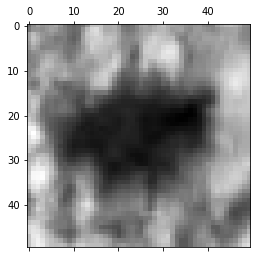

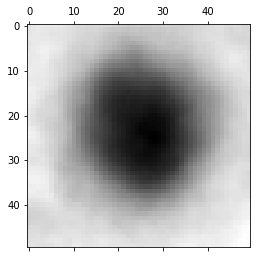

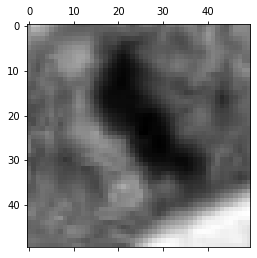

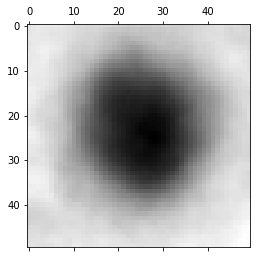

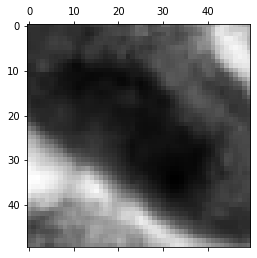

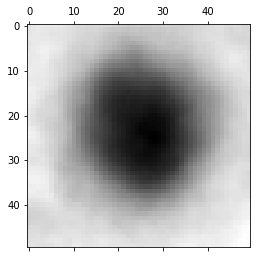

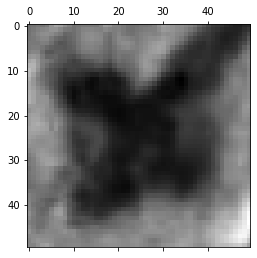

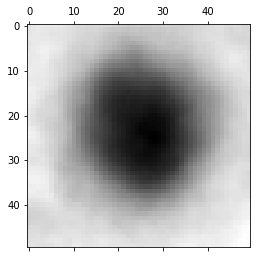

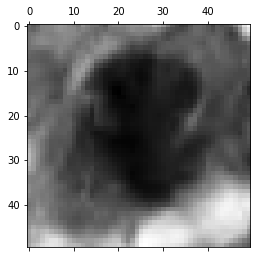

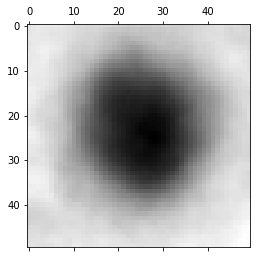

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

output_nd = output_layer.eval(feed_dict = {x:data[100:200]/255})
for i in [0, 1, 2, 3, 4]:
    curr_img = np.reshape(data[i, :], (50, 50)) 
    ae_img = np.reshape(output_nd[i,:]*255, (50, 50))
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.matshow(ae_img, cmap=plt.get_cmap('gray'))

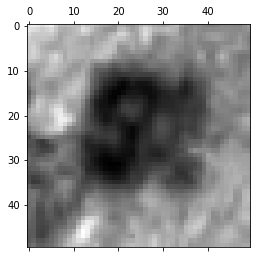

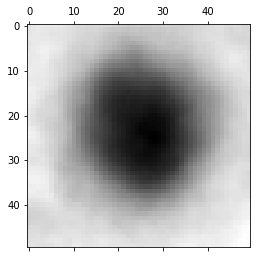

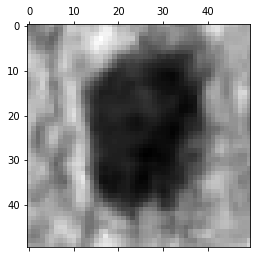

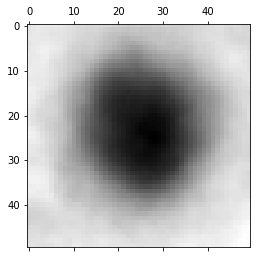

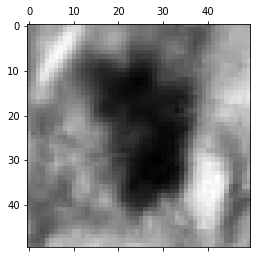

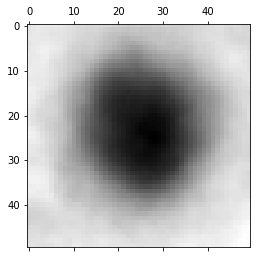

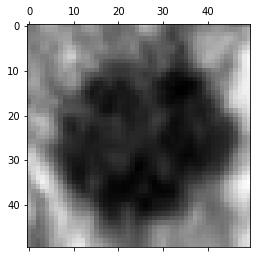

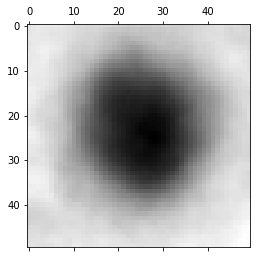

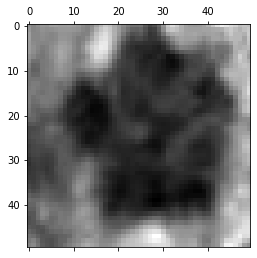

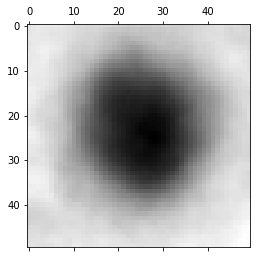

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

output_nd = output_layer.eval(feed_dict = {x:data_test/255})
for i in [0, 1, 2, 3, 4]:
    curr_img = np.reshape(data_test[i, :], (50, 50)) 
    ae_img = np.reshape(output_nd[i,:], (50, 50))
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.matshow(ae_img, cmap=plt.get_cmap('gray'))